# 1.线性回归

In [1]:
# 导入所需要的库
import pandas as pd

# 读取文件
data = pd.read_csv('F:/学习库/大学学习/本科/大三上/机器学习与数据挖掘/期末项目/ffjdata.csv')

# 检查特征的数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   senior      2237 non-null   int64
 1   min_s_mon   2237 non-null   int64
 2   max_s_mon   2237 non-null   int64
 3   min_s_year  2237 non-null   int64
 4   max_s_year  2237 non-null   int64
 5   portion     2237 non-null   int64
 6   s_salary    2237 non-null   int64
 7   edu         2237 non-null   int64
 8   min_exp     2237 non-null   int64
 9   csize       2237 non-null   int64
 10  stack       2237 non-null   int64
 11  binsurance  2237 non-null   int64
 12  minsurance  2237 non-null   int64
 13  paleave     2237 non-null   int64
 14  fpe         2237 non-null   int64
 15  ebenefit    2237 non-null   int64
 16  cclass      2237 non-null   int64
 17  internet    2237 non-null   int64
 18  jclass1     2237 non-null   int64
dtypes: int64(19)
memory usage: 332.2 KB


In [2]:
data.columns

Index(['senior', 'min_s_mon', 'max_s_mon', 'min_s_year', 'max_s_year',
       'portion', 's_salary', 'edu', 'min_exp', 'csize', 'stack', 'binsurance',
       'minsurance', 'paleave', 'fpe', 'ebenefit', 'cclass', 'internet',
       'jclass1'],
      dtype='object')

In [3]:
print(data.head()) # 显示前5项数据
print(data.tail()) # 显示最后5项数据
print(data.shape)  # 查看DataFame的维度

   senior  min_s_mon  max_s_mon  min_s_year  max_s_year  portion  s_salary  \
0       1          4          6          48          72       12        56   
1       1         15         25         195         325       13       240   
2       1          5          7          65          91       13        74   
3       1         10         13         120         156       12       132   
4       1          9         14         117         182       13       139   

   edu  min_exp  csize  stack  binsurance  minsurance  paleave  fpe  ebenefit  \
0    1        0      1      0           0           0        0    0         0   
1    2        1      2      0           1           0        1    1         5   
2    1        0      4      0           1           0        1    1         7   
3    3        0      2      1           1           1        1    1         5   
4    1        1      1      0           1           0        1    1         8   

   cclass  internet  jclass1  
0       1    

# 2.数据预处理

In [4]:
# 不考虑min_s_mon、max_s_mon、min_s_year、max_s_year

# 连续变量
# ebenefit

# 分类变量列表
data['edu'] = data['edu'].apply(str)
data['min_exp'] = data['min_exp'].apply(str)
data['csize'] = data['csize'].apply(str)
data['cclass']= data['cclass'].apply(str)
data['jclass1'] = data['jclass1'].apply(str)

# 虚拟变量列表
data['senior'] = data['senior'].apply(str)
data['stack'] = data['stack'].apply(str)
data['binsurance'] = data['binsurance'].apply(str)
data['minsurance'] = data['minsurance'].apply(str)
data['paleave'] = data['paleave'].apply(str)
data['fpe'] = data['fpe'].apply(str)
data['internet'] = data['internet'].apply(str)
data['jclass1'] = data['jclass1'].apply(str) # 对portion的处理

In [5]:
# 删除缺失值
data=data.dropna()

In [6]:
data.describe()

,min_s_mon,max_s_mon,min_s_year,max_s_year,portion,s_salary,ebenefit
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,10.811354,17.638802,143.554761,234.872150,12.973178,175.202056,4.578453
std,8.027858,13.602098,115.186833,196.622607,0.927225,142.425480,3.171843
min,1.000000,2.000000,12.000000,26.000000,12.000000,40.000000,0.000000
25%,5.000000,9.000000,65.000000,108.000000,12.000000,81.000000,2.000000
50%,9.000000,13.000000,117.000000,169.000000,13.000000,131.000000,5.000000
75%,14.000000,22.000000,180.000000,286.000000,13.000000,217.000000,7.000000
max,75.000000,100.000000,1125.000000,1600.000000,16.000000,1288.000000,16.000000


In [7]:
data.head()

,senior,min_s_mon,max_s_mon,min_s_year,max_s_year,portion,s_salary,edu,min_exp,csize,stack,binsurance,minsurance,paleave,fpe,ebenefit,cclass,internet,jclass1
0,1,4,6,48,72,12,56,1,0,1,0,0,0,0,0,0,1,1,6
1,1,15,25,195,325,13,240,2,1,2,0,1,0,1,1,5,1,0,2
2,1,5,7,65,91,13,74,1,0,4,0,1,0,1,1,7,4,1,5
3,1,10,13,120,156,12,132,3,0,2,1,1,1,1,1,5,2,1,6
4,1,9,14,117,182,13,139,1,1,1,0,1,0,1,1,8,1,1,3


# 3. 探索性分析

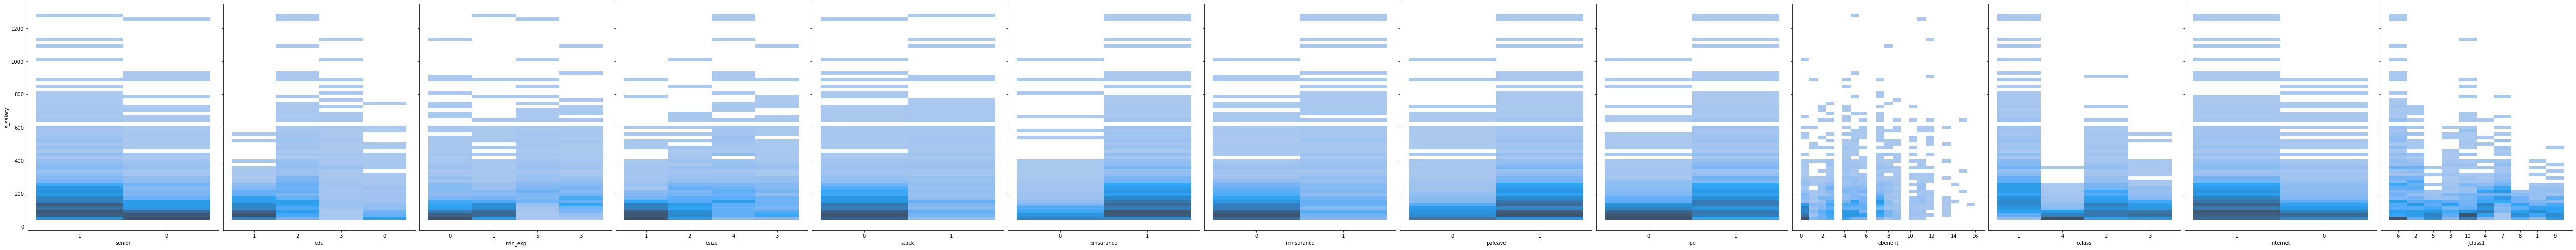

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['senior','edu','min_exp','csize','stack','binsurance','minsurance','paleave','fpe','ebenefit','cclass','internet','jclass1'], y_vars='s_salary', height = 7, aspect=0.8, kind='hist') 

#x_vars x轴要画的13个特征，y_vars y轴要画的，height高，aspect比例，kind类别。
plt.show()

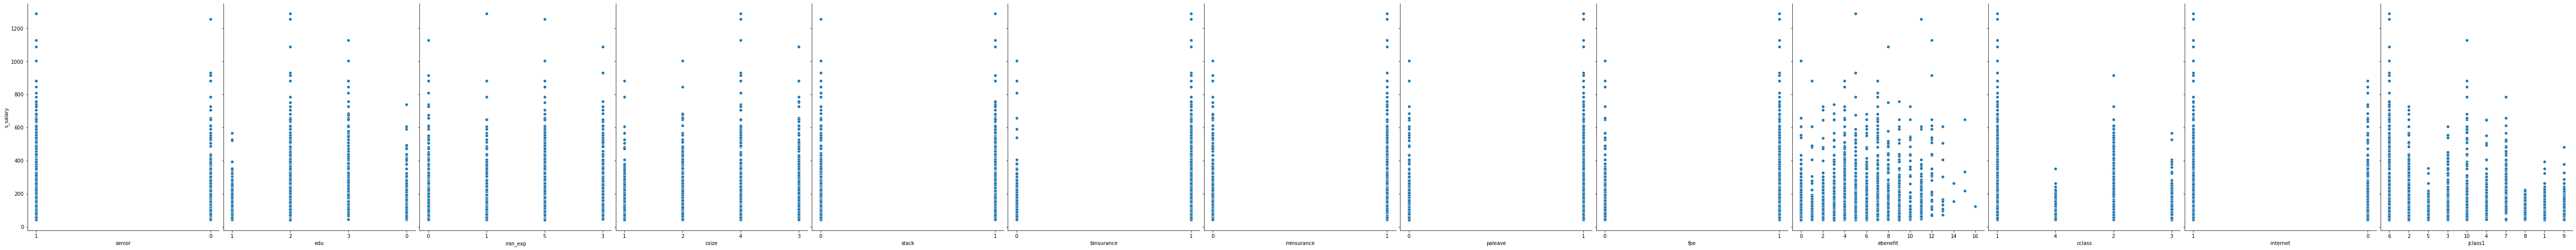

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['senior','edu','min_exp','csize','stack','binsurance','minsurance','paleave','fpe','ebenefit','cclass','internet','jclass1'], y_vars='s_salary', height = 7, aspect=0.8, kind='scatter') 

#x_vars x轴要画的13个特征，y_vars y轴要画的，height高，aspect比例，kind类别。
plt.show()

# 4. 模型

## 构建X： 选取13个特征

In [10]:
# 对特征
features = ['senior','edu','min_exp','csize','stack','binsurance','minsurance','paleave','fpe','ebenefit','cclass','internet','jclass1']

# 提取特征列
X = data[features]

# 处理分类变量，转换成虚拟变量
X = pd.get_dummies(X, columns=features, drop_first = True)

In [11]:
print(X.head()) # 输出前五项数据
print(type(X)) # X的类型
print(X.shape) # X的维数

   senior_1  edu_1  edu_2  edu_3  min_exp_1  min_exp_3  min_exp_5  csize_2  \
0         1      1      0      0          0          0          0        0   
1         1      0      1      0          1          0          0        1   
2         1      1      0      0          0          0          0        0   
3         1      0      0      1          0          0          0        1   
4         1      1      0      0          1          0          0        0   

   csize_3  csize_4  ...  internet_1  jclass1_10  jclass1_2  jclass1_3  \
0        0        0  ...           1           0          0          0   
1        0        0  ...           0           0          1          0   
2        0        1  ...           1           0          0          0   
3        0        0  ...           1           0          0          0   
4        0        0  ...           1           0          0          1   

   jclass1_4  jclass1_5  jclass1_6  jclass1_7  jclass1_8  jclass1_9  
0          0    

In [12]:
X.columns ## 索引：特征名
#X里面有哪些列，可通过colums查看。

Index(['senior_1', 'edu_1', 'edu_2', 'edu_3', 'min_exp_1', 'min_exp_3',
       'min_exp_5', 'csize_2', 'csize_3', 'csize_4', 'stack_1', 'binsurance_1',
       'minsurance_1', 'paleave_1', 'fpe_1', 'ebenefit_1', 'ebenefit_2',
       'ebenefit_3', 'ebenefit_4', 'ebenefit_5', 'ebenefit_6', 'ebenefit_7',
       'ebenefit_8', 'ebenefit_9', 'ebenefit_10', 'ebenefit_11', 'ebenefit_12',
       'ebenefit_13', 'ebenefit_14', 'ebenefit_15', 'ebenefit_16', 'cclass_2',
       'cclass_3', 'cclass_4', 'internet_1', 'jclass1_10', 'jclass1_2',
       'jclass1_3', 'jclass1_4', 'jclass1_5', 'jclass1_6', 'jclass1_7',
       'jclass1_8', 'jclass1_9'],
      dtype='object')

## 构建y: 选取s_salary作为输出变量

In [13]:
# 导入所需要的库
import numpy as np

In [14]:
# 对y
data['s_salary_log'] = data['s_salary'].apply(np.log)
y = data['s_salary_log']# 设置y值，把工资作为连续变量取对数作为y值

In [15]:
# 输出前五项数据
print(y.head())

print(type(y))
print(y.shape)

0    4.025352
1    5.480639
2    4.304065
3    4.882802
4    4.934474
Name: s_salary_log, dtype: float64
<class 'pandas.core.series.Series'>
(2237,)


## 构建训练集和测试集

In [16]:
from sklearn.model_selection import train_test_split # 随机生成训练集和测试集

# 80% 用于训练， 20%用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) 

In [17]:
X_train.head()

,senior_1,edu_1,edu_2,edu_3,min_exp_1,min_exp_3,min_exp_5,csize_2,csize_3,csize_4,...,internet_1,jclass1_10,jclass1_2,jclass1_3,jclass1_4,jclass1_5,jclass1_6,jclass1_7,jclass1_8,jclass1_9
287,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1855,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1946,1,0,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
2057,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
438,1,1,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [18]:
X_test.head()

,senior_1,edu_1,edu_2,edu_3,min_exp_1,min_exp_3,min_exp_5,csize_2,csize_3,csize_4,...,internet_1,jclass1_10,jclass1_2,jclass1_3,jclass1_4,jclass1_5,jclass1_6,jclass1_7,jclass1_8,jclass1_9
135,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
688,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
39,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1708,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2131,1,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [19]:
y_train.head()

287     4.110874
1855    4.276666
1946    6.361302
2057    4.477337
438     5.209486
Name: s_salary_log, dtype: float64

In [20]:
y_test.head()

135     3.951244
688     5.170484
39      3.688879
1708    4.948760
2131    4.477337
Name: s_salary_log, dtype: float64

## 进行线性回归

In [21]:
from sklearn.linear_model import LinearRegression

### step 1: 定义线性回归模型

In [22]:
linreg = LinearRegression() ## 使用默认参数设置

### step 2: 在训练集上训练（拟合fit）线性回归模型

In [23]:
linreg.fit(X_train, y_train)

LinearRegression()

### step 3: 查看在训练集上估计的线性回归参数

In [24]:
print (linreg.intercept_) #下划线是必须的。
print (linreg.coef_)

4.648112320046265
[ 0.13918958 -0.06149249  0.12509163  0.43485336  0.04011452  0.32901764
  0.57724991  0.09034976  0.20839025  0.32144929  0.14484335  0.0940527
  0.05847064  0.00343401  0.04466098 -0.08919927 -0.08321442 -0.0240391
 -0.03569704 -0.08681386 -0.05860019 -0.03601848 -0.05568804 -0.01832198
 -0.08548511  0.02899573  0.0804987  -0.10025369 -0.038558    0.16613446
 -0.38020552 -0.2658701  -0.42776671 -0.65140487  0.06817112 -0.14939939
 -0.04367843 -0.01309372 -0.04530891 -0.33888809  0.11795344  0.02502129
 -0.34462867 -0.02491206]


#### 将特征名称与参数相对应: 利用pandas的DataFrame

pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)

In [25]:
pd.DataFrame(data = linreg.coef_, index = X.columns, columns = ['coef']) ## 用特征名(X.columns)作为索引

,coef
senior_1,0.139190
edu_1,-0.061492
edu_2,0.125092
edu_3,0.434853
min_exp_1,0.040115
min_exp_3,0.329018
min_exp_5,0.577250
csize_2,0.090350
csize_3,0.208390
csize_4,0.321449


### 解释线性回归模型参数

### Step 4: 在测试集上做预测

predict函数：predict(X) 用线性回归做预测

In [26]:
y_pred = linreg.predict(X_test)

# 5. 评价模型（在测试集上）

In [27]:
from sklearn import metrics
import numpy as np

MSE = metrics.mean_squared_error(y_test, y_pred) ## 均方误差
RMSE = np.sqrt(MSE) # 均方根误差

In [28]:
print(MSE)
print(RMSE)

0.1540609178558352
0.3925059462681237


In [29]:
R2 = linreg.score(X_test, y_test)
print(R2)

0.6629212125370452


# 6.可视化： 画出在测试集上的预测值和真实值Y的对比图

### 方法一：在同一张图中分别画出预测值的线和真实值的线

#### 纵坐标y代表对应的预测值或真实值

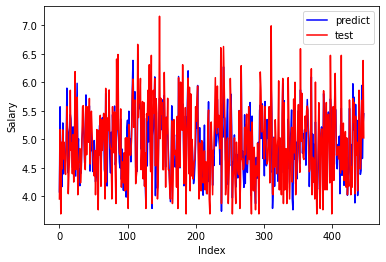

In [30]:
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b',label="predict") ## 预测值用蓝色线表示
plt.plot(range(len(y_pred)), y_test, 'r',label="test") ## 真实值用红色线表示
plt.legend(loc="upper right") #显示图中的标签
#loc是location表示位置，upper right是右上方。
plt.xlabel("Index")
#X轴的标签名字。
plt.ylabel('Salary')
#Y轴的标签名字。
plt.show()
#plt为matplotlib简写。
#可以看哪些预测得好，哪些预测得不好。

### 方法二：预测值 vs 真实值

#### 横坐标代表真实值，纵坐标代表预测值 (可以交换)

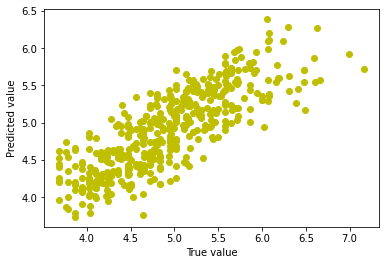

In [31]:
#45°线上的预测结果最好，代表预测值=真实值；接近这条线则相关关系大。
plt.figure()
#plt.plot(y_test,y_pred, 'bo',label="predict") ## bo: 蓝色的圈
#b是颜色，即blue是蓝色；o是点。
plt.plot(y_test,y_pred, 'yo',label="predict")
#y为黄色。
plt.xlabel("True value")
plt.ylabel('Predicted value')
plt.show()